In [25]:
import json
import csv
import os
import matplotlib.pyplot as plt

In [3]:
!ls "myLabels/"
!ls "labels_1125/"

ASampleAll_aj_micro.json     bwex_30000_35217_micro.json
ASampleAll_jz_micro.json     bwex_30000_35217_micro_orig.json
ASampleAll_micro.json	     cleanandjerk_macro.json
ASampleAll_pf_micro.json     cleanandjerk_micro.json
benchpress_flaw.json	     deadlift_flaw.json
benchpress_macro.json	     deadlift_macro.json
benchpress_micro.json	     deadlift_micro.json
bwex_00000_05000_micro.json  extracted_labeled_flaw_videos.json
bwex_05000_10000_micro.json  snatch_macro.json
bwex_10000_15000_micro.json  snatch_micro.json
bwex_15000_20000_micro.json  squat_flaw.json
bwex_20000_25000_micro.json  squat_macro.json
bwex_25000_30000_micro.json  squat_micro.json
benchpress_flaw.json  deadlift_flaw.json  squat_flaw.json


In [4]:
# generates a JSON of the flaw counts that are part of the flaw labeled videos

root = "labels_1201/"
# root = "myLabels/"

flaw_json_list = ["benchpress_flaw", "deadlift_flaw", "squat_flaw"]
flaw_dict = {}
flaw_count = {}

for s in flaw_json_list:
    with open(root + s + ".json") as f:
        flaw_json = json.load(f)
    
#     print(s)
    flaw_dict[s] = []
#     print(flaw_json)
    flaw_count[s] = {}

#     for k in ['descent', 'ascent', 'setup', 'bottom']:
#         flaw_count[k] = {}
        
    for val in flaw_json["data"]:
#         print(val)
        lt = val["gt_labels"]["lift_type"]
        labeled_flag = False
        
        for k, v in lt.items():
#             print(k, v)
            if k not in flaw_count[s]:
                flaw_count[s][k] = {}
            
            for flaw in v:
                if flaw not in flaw_count[s][k]:
                    flaw_count[s][k][flaw] = 0
                
                flaw_count[s][k][flaw] += 1

                
#             if v != []:
#                 labeled_flag = True
        
#         if labeled_flag:
#             temp_dict = {}
#             temp_dict["filename"] = val["metadata"]["filename"]
#             temp_dict["folder"] = val["metadata"]["folder"]
#             flaw_dict[s].append(temp_dict)
        
# print(flaw_list)
# print(json.dumps(flaw_dict, sort_keys=True, indent=4))
print(json.dumps(flaw_count, sort_keys=True, indent=4))

# save_file_path = root + "extracted_labeled_flaw_videos.json"

# os.makedirs(os.path.dirname(save_file_path), exist_ok=True)
# with open(save_file_path, 'w') as f:
#     json.dump(flaw_dict, f, indent=4, separators=(',', ': '), sort_keys=True)

{
    "benchpress_flaw": {
        "ascent": {
            "bad angle": 59,
            "butt lift": 59,
            "feet move": 10,
            "no legs": 94,
            "no lockout": 34
        },
        "bottom": {
            "arch lost": 3,
            "bounce": 59,
            "no touch": 25,
            "pause": 88,
            "touch high": 14
        },
        "descent": {
            "feet on bench": 4,
            "flared elbows": 1,
            "head lift": 28,
            "loose back": 1,
            "too fast": 10
        },
        "setup": {
            "X": 16,
            "arch": 287,
            "bent wrist": 1,
            "butt up": 1,
            "heels lift": 86,
            "heels up": 2,
            "not stacked": 1
        }
    },
    "deadlift_flaw": {
        "ascent": {
            "bad angle": 19,
            "grip fail": 4,
            "hitch": 37
        },
        "descent": {
            "bar drop": 27,
            "butt back": 11,
            "sq

squat_flaw bottom


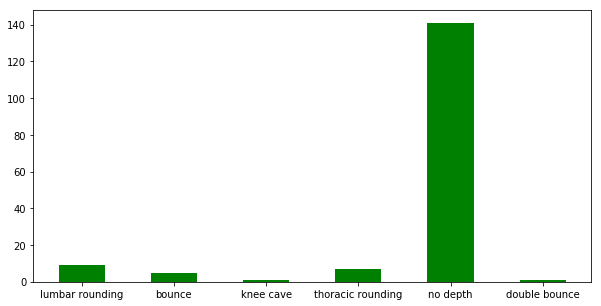

squat_flaw overall


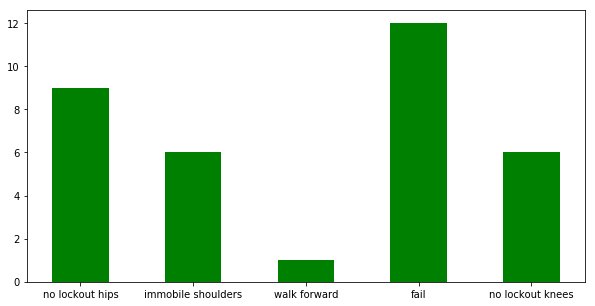

squat_flaw ascent


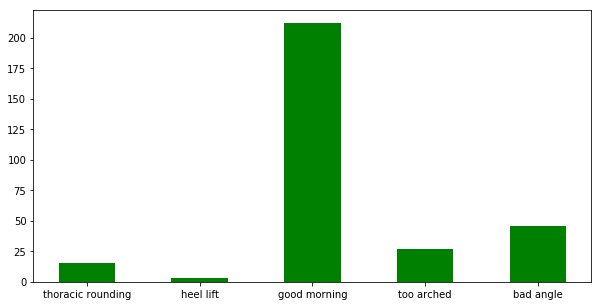

squat_flaw setup


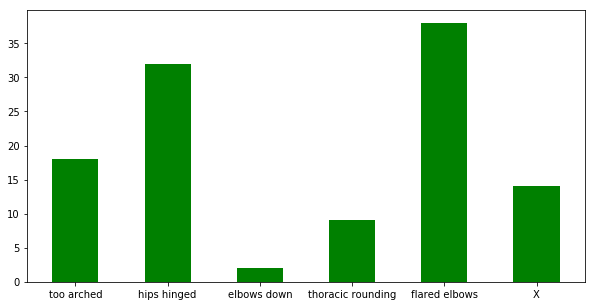

squat_flaw descent


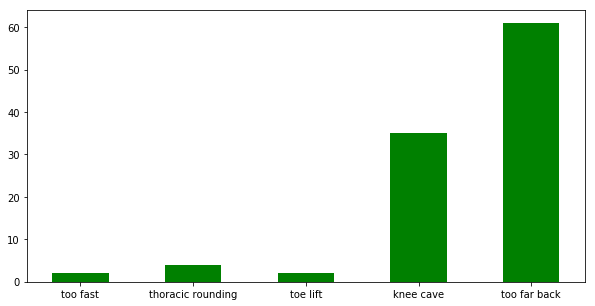

benchpress_flaw bottom


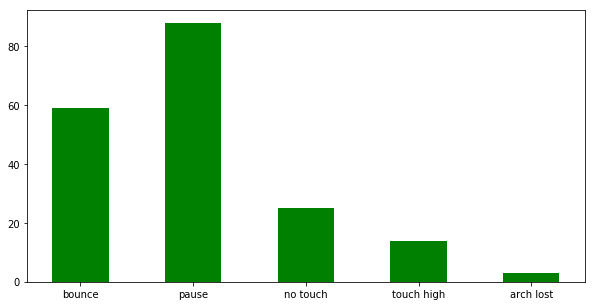

benchpress_flaw setup


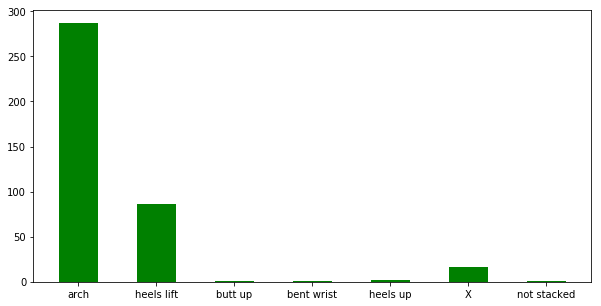

benchpress_flaw ascent


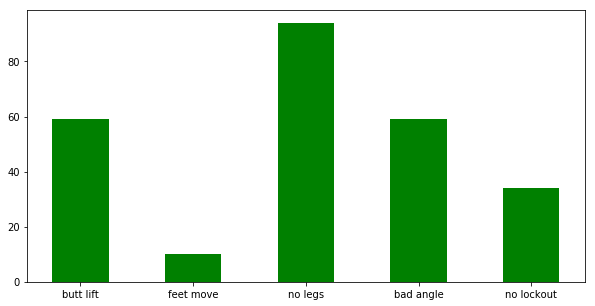

benchpress_flaw descent


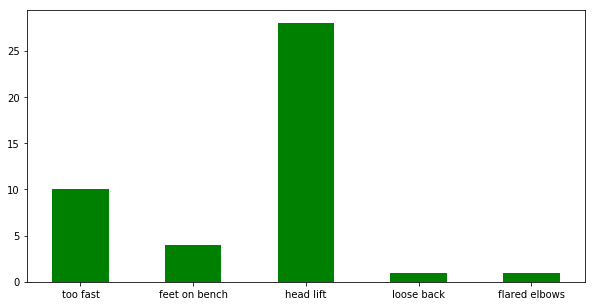

deadlift_flaw descent


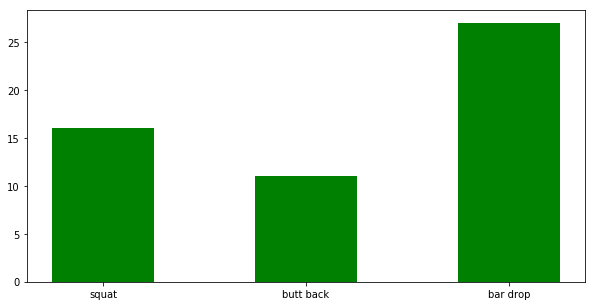

deadlift_flaw setup


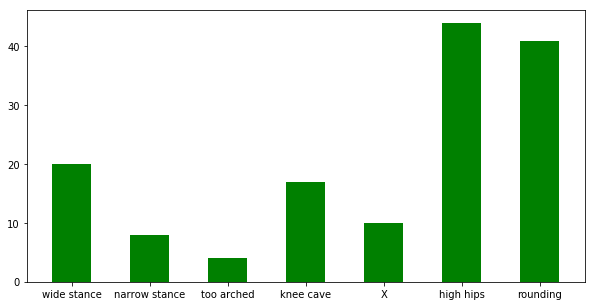

deadlift_flaw ascent


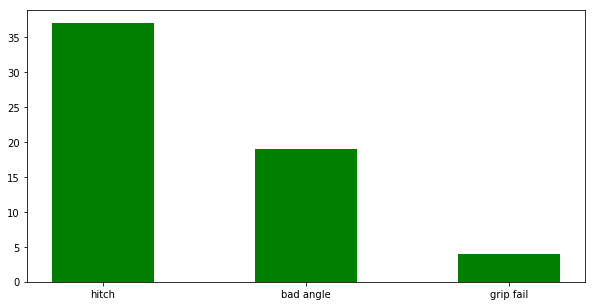

deadlift_flaw floor break


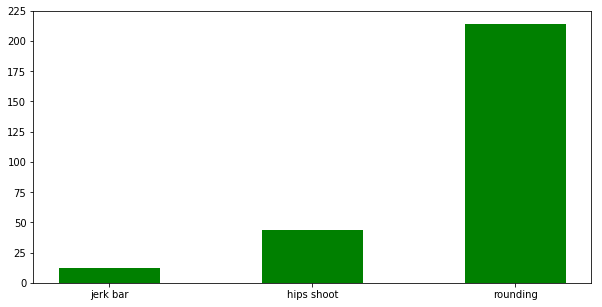

deadlift_flaw top


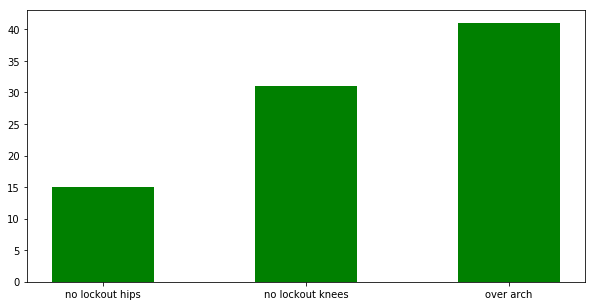

In [5]:
for k1 in flaw_count.keys():
    for k2 in flaw_count[k1].keys():
#         print(k2)
        print(k1, k2)
        plt.figure(figsize=(10,5))
        plt.bar(list(flaw_count[k1][k2].keys()), list(flaw_count[k1][k2].values()), width=0.5, color='g')
        plt.show()


In [6]:
# import matplotlib.pyplot as plt

# dictionary = {1: 27, 34: 1, 3: 72, 4: 62, 5: 33, 6: 36, 7: 20, 8: 12, 9: 9, 10: 6, 11: 5, 
#               12: 8, 2: 74, 14: 4, 15: 3, 16: 1, 17: 1, 18: 1, 19: 1, 21: 1, 27: 2}
# plt.bar(list(dictionary.keys()), list(dictionary.values()), color='g')
# plt.show()

In [57]:
# generates a JSON of the count of videos that have been flaw labeled in the lift videos categorized by lift type

root = "labels_1201/"
openpose_path = "/data0/Results/lifting_openpose/"

flaw_json_list = ["benchpress_flaw", "deadlift_flaw", "squat_flaw"]
flaw_dict = {}

for s in flaw_json_list:
    with open(root + s + ".json") as f:
        flaw_json = json.load(f)
        
    flaw_dict[s] = 0
#     print(flaw_json)
    for val in flaw_json["data"]:
#         print(val)
        lt = val["gt_labels"]["lift_type"]
        labeled_flag = False
        for k, v in lt.items():
            if v != []:
                labeled_flag = True
        
        if labeled_flag:
            flaw_dict[s] += 1
        
# print(flaw_list)
print(json.dumps(flaw_dict, sort_keys=True, indent=4))

# save_file_path = root + "extracted_labeled_flaw_videos.json"

# os.makedirs(os.path.dirname(save_file_path), exist_ok=True)
# with open(save_file_path, 'w') as f:
#     json.dump(flaw_dict, f, indent=4, separators=(',', ': '), sort_keys=True)

{
    "benchpress_flaw": 393,
    "deadlift_flaw": 353,
    "squat_flaw": 383
}


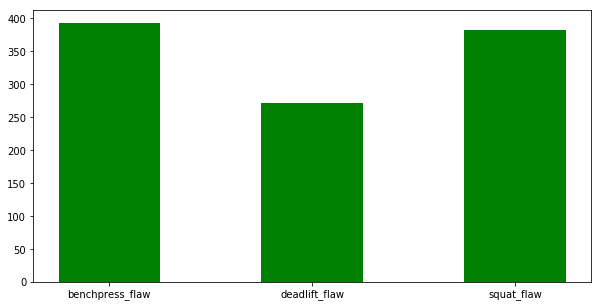

In [19]:
plt.figure(figsize=(10,5))
plt.bar(list(flaw_dict.keys()), list(flaw_dict.values()), width=0.5, color='g')
plt.show()

In [58]:
# generates a JSON of the flaws that are part of both the flaw labeled videos and rep labeled videos

root = "labels_1201/"
list_of_reps = "rep_labels.txt"
# root = "myLabels/"

csvfile = open(list_of_reps, 'r')
flaw_json_list = ["benchpress_flaw", "deadlift_flaw", "squat_flaw"]
flaw_dict = {}
flaw_count = {}
flaw_list = {}
rep_labeled_list = []
orig_flaws_dict = {
    "benchpress_flaw": [
        "heels lift",
        "butt lift",
        "feet move",
        "head lift",
        "feet on bench",
        "too fast",
        "flared elbows",
        "butt up"
    ],
    "deadlift_flaw": [
        "wide stance",
        "high hips",
        "butt back",
        "hips shoot",
        "jerk bar",
        "hitch",
        "over arch",
        "no lockout knees", # loose knees?
        "squat",
        "too arched", # Over arch?
        "knee cave",
        "narrow stance"
    ],
    "squat_flaw": [
        "good morning",
        "no depth",
        "hips hinged",
        "too far back",
        "flared elbows",
        "knee cave",
        "too fast",
        "elbows down"
    ]
}

detectable_flaws_dict = {
    "benchpress_flaw": [
        "heels lift",
        "butt lift",
        "no lockout",
        "touch high",
        "no legs",
        "feet move",
        "head lift",
        "bounce",
        "feet on bench",
        "too fast",
        "butt up"
    ],
    "deadlift_flaw": [
        "wide stance",
        "high hips",
        "hips shoot",
        "hitch",
        "no lockout knees",
        "no lockout hips",
        "grip fail",
        "narrow stance"
    ],
    "squat_flaw": [
        "good morning",
        "no depth",
        "hips hinged",
        "bounce",
        "fail",
        "heel lift",
        "too fast",
        "immobile shoulders",
        "double bounce",
        "no lockout hips",
        "walk forward"
    ]
}

fieldnames = ("folder","filename","rep_number","start_frame","end_frame")
reader = csv.DictReader( csvfile, fieldnames)
next(reader) # to skip first line
for row in reader:
#     print(row)
#     print(row["folder"])
#     print(row["filename"])
    temp_dict = {}
    
    temp_dict["folder"] = row["folder"]
    temp_dict["filename"] = row["filename"]
    
    rep_labeled_list.append(temp_dict)
    
#     for fn in fieldnames:
#         print(fn, row[fn])

# print(json.dumps(rep_labeled_list, sort_keys=True, indent=4))



for s in flaw_json_list:
    with open(root + s + ".json") as f:
        flaw_json = json.load(f)
    
#     print(s)
    flaw_dict[s] = []
#     print(flaw_json)
    flaw_count[s] = {}

#     for k in ['descent', 'ascent', 'setup', 'bottom']:
#         flaw_count[k] = {}
        
    for val in flaw_json["data"]:
#         print(val)
#         print(json.dumps(val, sort_keys=True, indent=4))
#         print(json.dumps(val["metadata"], sort_keys=True, indent=4))


        lt = val["gt_labels"]["lift_type"]        
        md = val["metadata"]
        
        rep_labeled_flag = False
        
        for d in rep_labeled_list:
            if d["folder"] == md["folder"] and d["filename"] == md["filename"]:
                rep_labeled_flag = True

#         labeled_flag = False

#         if True:
        if rep_labeled_flag == True:
            for k, v in lt.items():
#                 print(k, v)
                if s not in flaw_list:
                    flaw_list[s] = []

                for flaw in v:
                    if flaw not in flaw_list[s]:
    #                     print(flaw_list[s])
                        flaw_list[s].append(flaw)

    #                 flaw_count[s][k][flaw] += 1


    #             if v != []:
    #                 labeled_flag = True

    #         if labeled_flag:
    #             temp_dict = {}
    #             temp_dict["filename"] = val["metadata"]["filename"]
    #             temp_dict["folder"] = val["metadata"]["folder"]
    #             flaw_dict[s].append(temp_dict)
        
# print(flaw_list)
# print(json.dumps(flaw_dict, sort_keys=True, indent=4))
print(json.dumps(flaw_list, sort_keys=True, indent=4))
print(json.dumps(flaw_count, sort_keys=True, indent=4))


# save_file_path = root + "extracted_labeled_flaw_videos.json"

# os.makedirs(os.path.dirname(save_file_path), exist_ok=True)
# with open(save_file_path, 'w') as f:
#     json.dump(flaw_dict, f, indent=4, separators=(',', ': '), sort_keys=True)

{
    "benchpress_flaw": [
        "arch",
        "no lockout",
        "no legs",
        "bad angle",
        "butt lift",
        "bounce",
        "no touch",
        "heels lift",
        "pause",
        "touch high",
        "arch lost",
        "too fast"
    ],
    "deadlift_flaw": [
        "bad angle",
        "rounding",
        "bar drop",
        "butt back",
        "over arch",
        "squat",
        "high hips",
        "no lockout hips",
        "no lockout knees",
        "X",
        "hips shoot",
        "grip fail",
        "wide stance",
        "hitch",
        "jerk bar"
    ],
    "squat_flaw": [
        "good morning",
        "hips hinged",
        "too arched",
        "too far back",
        "bad angle",
        "X",
        "no depth",
        "fail",
        "heel lift",
        "knee cave",
        "thoracic rounding",
        "flared elbows",
        "toe lift",
        "immobile shoulders"
    ]
}
{
    "benchpress_flaw": {},
    "deadlift_flaw": {

In [75]:
# generates a JSON of the count of flaws that are part of both the flaw labeled videos and rep labeled videos
# based on the original flaw list and the flaws that are feasible to detect

root = "labels_1201/"
list_of_reps = "rep_labels.txt"
# root = "myLabels/"

csvfile = open(list_of_reps, 'r')
flaw_json_list = ["benchpress_flaw", "deadlift_flaw", "squat_flaw"]
flaw_dict = {}
flaw_count = {}
flaw_count_orig = {}
flaw_count_detect = {}
flaw_list = {}
rep_labeled_list = []
orig_flaws_dict = {
    "benchpress_flaw": [
        "heels lift",
        "butt lift",
        "feet move",
        "head lift",
        "feet on bench",
        "too fast",
        "flared elbows",
        "butt up"
    ],
    "deadlift_flaw": [
        "wide stance",
        "high hips",
        "butt back",
        "hips shoot",
        "jerk bar",
        "hitch",
        "over arch",
        "no lockout knees", # loose knees?
        "squat",
        "too arched", # Over arch?
        "knee cave",
        "narrow stance"
    ],
    "squat_flaw": [
        "good morning",
        "no depth",
        "hips hinged",
        "too far back",
        "flared elbows",
        "knee cave",
        "too fast",
        "elbows down"
    ]
}

detectable_flaws_dict = {
    "benchpress_flaw": [
        "heels lift",
        "butt lift",
        "no lockout",
        "touch high",
        "no legs",
        "feet move",
        "head lift",
        "bounce",
        "feet on bench",
        "too fast",
        "butt up"
    ],
    "deadlift_flaw": [
        "wide stance",
        "high hips",
        "hips shoot",
        "hitch",
        "no lockout knees",
        "no lockout hips",
        "grip fail",
        "narrow stance"
    ],
    "squat_flaw": [
        "good morning",
        "no depth",
        "hips hinged",
        "bounce",
        "fail",
        "heel lift",
        "too fast",
        "immobile shoulders",
        "double bounce",
        "no lockout hips",
        "walk forward"
    ]
}

fieldnames = ("folder","filename","rep_number","start_frame","end_frame")
reader = csv.DictReader( csvfile, fieldnames)
next(reader) # to skip first line
for row in reader:
#     print(row)
#     print(row["folder"])
#     print(row["filename"])
    temp_dict = {}
    
    temp_dict["folder"] = row["folder"]
    temp_dict["filename"] = row["filename"]
    
    rep_labeled_list.append(temp_dict)
    
#     for fn in fieldnames:
#         print(fn, row[fn])

# print(json.dumps(rep_labeled_list, sort_keys=True, indent=4))



for s in flaw_json_list:
    with open(root + s + ".json") as f:
        flaw_json = json.load(f)
    
#     print(s)
    flaw_dict[s] = []
#     print(flaw_json)
    flaw_count[s] = {}
    flaw_count_orig[s] = {}
    flaw_count_detect[s] = {}

#     for k in ['descent', 'ascent', 'setup', 'bottom']:
#         flaw_count[k] = {}
        
    for val in flaw_json["data"]:
#         print(val)
#         print(json.dumps(val, sort_keys=True, indent=4))
#         print(json.dumps(val["metadata"], sort_keys=True, indent=4))


        lt = val["gt_labels"]["lift_type"]        
        md = val["metadata"]
        
        rep_labeled_flag = False
        
        for d in rep_labeled_list:
            if d["folder"] == md["folder"] and d["filename"] == md["filename"]:
                rep_labeled_flag = True
        
#         labeled_flag = False

#         if True:
        if rep_labeled_flag == True:
            for k, v in lt.items():
                if k not in flaw_count[s]:
                    flaw_count[s][k] = {}
                if k not in flaw_count_orig[s]:
                    flaw_count_orig[s][k] = {}
                if k not in flaw_count_detect[s]:
                    flaw_count_detect[s][k] = {}

                for flaw in v:
                    if flaw not in flaw_count[s][k]:
                        flaw_count[s][k][flaw] = 0
                    if flaw not in flaw_count_orig[s][k]:
                        flaw_count_orig[s][k][flaw] = 0
                    if flaw not in flaw_count_detect[s][k]:
                        flaw_count_detect[s][k][flaw] = 0

                    flaw_count[s][k][flaw] += 1
#                     print(flaw, orig_flaws_dict[s])
                    if flaw in orig_flaws_dict[s]:
#                         print(flaw, orig_flaws_dict[s])
                        flaw_count_orig[s][k][flaw] += 1

                    if flaw in detectable_flaws_dict[s]:
#                         print(flaw, orig_flaws_dict[s])
                        flaw_count_detect[s][k][flaw] += 1
                    
                        
                
# #                 print(k, v)
#                 if s not in flaw_list:
#                     flaw_list[s] = []

#                 for flaw in v:
#                     if flaw not in flaw_list[s]:
#     #                     print(flaw_list[s])
#                         flaw_list[s].append(flaw)

#     #                 flaw_count[s][k][flaw] += 1


    #             if v != []:
    #                 labeled_flag = True

    #         if labeled_flag:
    #             temp_dict = {}
    #             temp_dict["filename"] = val["metadata"]["filename"]
    #             temp_dict["folder"] = val["metadata"]["folder"]
    #             flaw_dict[s].append(temp_dict)
        
# print(flaw_list)
# print(json.dumps(flaw_dict, sort_keys=True, indent=4))
# print(json.dumps(flaw_list, sort_keys=True, indent=4))
print("Flaw Count")
print(json.dumps(flaw_count, sort_keys=True, indent=4))
print("Flaw Count Original")
print(json.dumps(flaw_count_orig, sort_keys=True, indent=4))
print("Flaw Count Detectable")
print(json.dumps(flaw_count_detect, sort_keys=True, indent=4))


# save_file_path = root + "extracted_labeled_flaw_videos.json"

# os.makedirs(os.path.dirname(save_file_path), exist_ok=True)
# with open(save_file_path, 'w') as f:
#     json.dump(flaw_dict, f, indent=4, separators=(',', ': '), sort_keys=True)

Flaw Count
{
    "benchpress_flaw": {
        "ascent": {
            "bad angle": 6,
            "butt lift": 3,
            "no legs": 6,
            "no lockout": 4
        },
        "bottom": {
            "arch lost": 1,
            "bounce": 3,
            "no touch": 4,
            "pause": 6,
            "touch high": 1
        },
        "descent": {
            "too fast": 1
        },
        "setup": {
            "arch": 24,
            "heels lift": 9
        }
    },
    "deadlift_flaw": {
        "ascent": {
            "bad angle": 2,
            "grip fail": 1,
            "hitch": 2
        },
        "descent": {
            "bar drop": 1,
            "butt back": 3,
            "squat": 1
        },
        "floor break": {
            "hips shoot": 2,
            "jerk bar": 1,
            "rounding": 14
        },
        "setup": {
            "X": 2,
            "high hips": 2,
            "rounding": 6,
            "wide stance": 1
        },
        "top": {